# PARAMOUNT

In [1]:
# Pandas, Numpy, Matplotlib, Seaborn을 호출
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('default')
import seaborn as sns

# para_credits 변수를 만들고 credits.csv 파일의 데이터를 할당
para_credits = pd.read_csv('~/aiffel/paramount/credits.csv')

# para_credits의 head 값 확인하기
para_credits.head()

,person_id,id,name,character,role
0,21174,tm19248,Buster Keaton,Johnny Gray,ACTOR
1,28713,tm19248,Marion Mack,Annabelle Lee,ACTOR
2,28714,tm19248,Glen Cavender,Captain Anderson,ACTOR
3,28715,tm19248,Jim Farley,General Thatcher,ACTOR
4,27348,tm19248,Frederick Vroom,A Southern General,ACTOR


In [2]:
# para_titles 변수를 만들고 titles.csv 파일의 데이터를 할당
para_titles = pd.read_csv('~/aiffel/paramount/titles.csv')

# para_titles의 head 값 확인하기
para_titles.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,NaN,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],NaN,tt0017925,8.2,89766.0,8.647,8.0
1,tm83884,His Girl Friday,MOVIE,"Hildy, the journalist former wife of newspaper...",1940,NaN,92,"['comedy', 'drama', 'romance']",['US'],NaN,tt0032599,7.8,57835.0,11.270,7.4
2,tm19424,Detour,MOVIE,"The life of Al Roberts, a pianist in a New Yor...",1945,NaN,66,"['thriller', 'drama', 'crime']",['US'],NaN,tt0037638,7.3,17233.0,7.757,7.2
3,tm112005,Marihuana,MOVIE,A young girl named Burma attends a beach party...,1936,NaN,57,"['crime', 'drama']",['US'],NaN,tt0026683,4.0,864.0,3.748,3.6
4,tm22806,Intolerance: Love's Struggle Throughout the Ages,MOVIE,"The story of a poor young woman, separated by ...",1916,NaN,197,"['history', 'drama']",['US'],NaN,tt0006864,7.7,15242.0,9.412,7.2


In [3]:
# para_titles의 정보 확인하기
para_titles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2825 entries, 0 to 2824
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    2825 non-null   object 
 1   title                 2825 non-null   object 
 2   type                  2825 non-null   object 
 3   description           2812 non-null   object 
 4   release_year          2825 non-null   int64  
 5   age_certification     1302 non-null   object 
 6   runtime               2825 non-null   int64  
 7   genres                2825 non-null   object 
 8   production_countries  2825 non-null   object 
 9   seasons               626 non-null    float64
 10  imdb_id               2666 non-null   object 
 11  imdb_score            2613 non-null   float64
 12  imdb_votes            2613 non-null   float64
 13  tmdb_popularity       2768 non-null   float64
 14  tmdb_score            2337 non-null   float64
dtypes: float64(5), int64(

In [4]:
para_titles.shape

(2825, 15)

In [5]:
# 컬럼별 결측치 확인
para_titles.isnull().sum()

id                         0
title                      0
type                       0
description               13
release_year               0
age_certification       1523
runtime                    0
genres                     0
production_countries       0
seasons                 2199
imdb_id                  159
imdb_score               212
imdb_votes               212
tmdb_popularity           57
tmdb_score               488
dtype: int64

In [6]:
# 각 컬럼 간 상관관계
para_titles.corr()

,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
release_year,1.000000,-0.148340,-0.473802,0.111226,0.058203,0.074511,0.219097
runtime,-0.148340,1.000000,0.018069,-0.131106,0.290752,-0.007062,-0.215393
seasons,-0.473802,0.018069,1.000000,-0.033239,0.166703,0.069984,-0.027504
imdb_score,0.111226,-0.131106,-0.033239,1.000000,0.224220,0.063749,0.582808
imdb_votes,0.058203,0.290752,0.166703,0.224220,1.000000,0.083950,0.189729
tmdb_popularity,0.074511,-0.007062,0.069984,0.063749,0.083950,1.000000,0.110097
tmdb_score,0.219097,-0.215393,-0.027504,0.582808,0.189729,0.110097,1.000000


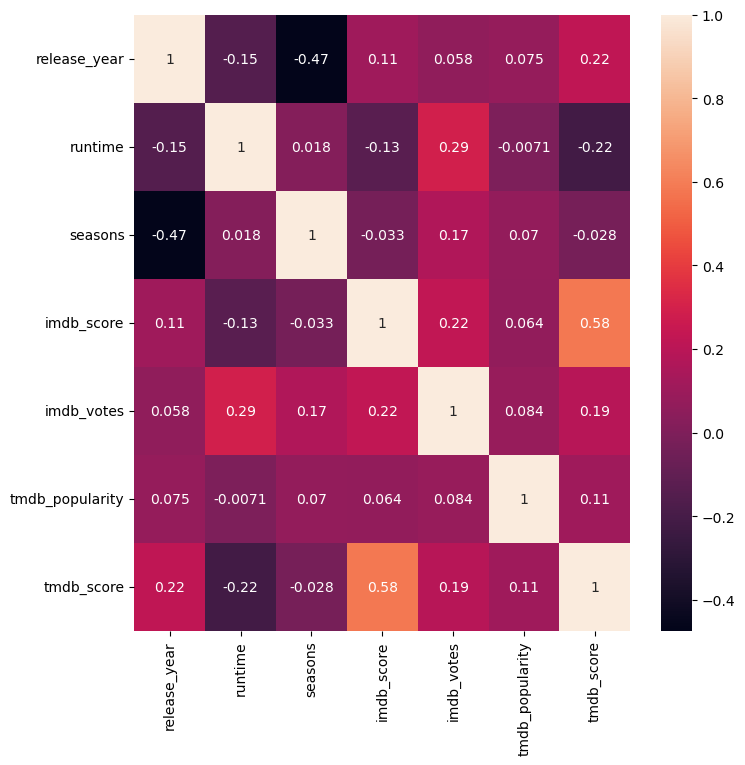

In [7]:
fig = plt.figure(figsize=(8,8))
fig.set_facecolor('white')
 
sns.heatmap(para_titles.corr(), annot=True)
 
plt.show()

In [8]:
# 필요없는 컬럼 제거
para = para_titles.drop(['age_certification', 'production_countries', 'imdb_id', 'description'], axis=1)
para

,id,title,type,release_year,runtime,genres,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,tm19248,The General,MOVIE,1926,78,"['action', 'drama', 'war', 'western', 'comedy'...",NaN,8.2,89766.0,8.647,8.0
1,tm83884,His Girl Friday,MOVIE,1940,92,"['comedy', 'drama', 'romance']",NaN,7.8,57835.0,11.270,7.4
2,tm19424,Detour,MOVIE,1945,66,"['thriller', 'drama', 'crime']",NaN,7.3,17233.0,7.757,7.2
3,tm112005,Marihuana,MOVIE,1936,57,"['crime', 'drama']",NaN,4.0,864.0,3.748,3.6
4,tm22806,Intolerance: Love's Struggle Throughout the Ages,MOVIE,1916,197,"['history', 'drama']",NaN,7.7,15242.0,9.412,7.2
...,...,...,...,...,...,...,...,...,...,...,...
2820,ts305329,House Calls with Dr. Phil,SHOW,2021,43,['reality'],1.0,5.4,35.0,0.600,NaN
2821,ts291097,Disrupt & Dismantle with Soledad O'Brien,SHOW,2021,40,['documentation'],1.0,3.5,18.0,NaN,NaN
2822,tm1100359,Race Against Time: The CIA and 9/11,MOVIE,2021,89,['documentation'],NaN,4.6,64.0,2.403,NaN
2823,tm1097570,Virus Hunting: Cave to COVID,MOVIE,2021,60,[],NaN,NaN,NaN,0.600,NaN


In [9]:
# seasons 컬럼은 결측치를 0으로 변경
para['seasons'] = para['seasons'].fillna(0)
print(para.shape)
para['seasons'].isnull().sum()

(2825, 11)


0

In [10]:
# imdb와 tmdb score가 둘 중 하나 NaN값인 경우 서로 채워주기
para['imdb_score'] = para['imdb_score'].fillna(para['tmdb_score'])

In [11]:
# imdb와 tmdb score가 둘 중 하나 NaN값인 경우 서로 채워주기
para['tmdb_score'] = para['tmdb_score'].fillna(para['imdb_score'])

In [12]:
# 보간 후 컬럼별 결측치 총합
para.isnull().sum()

id                   0
title                0
type                 0
release_year         0
runtime              0
genres               0
seasons              0
imdb_score         132
imdb_votes         212
tmdb_popularity     57
tmdb_score         132
dtype: int64

In [13]:
# 몇 가지 컨텐츠를 직접 imdb와 tmdb에 넣어본 결과 대체로 진짜 점수가 없는 경우가 대다수였다.
# 인기있는 컨텐츠를 뽑을 때 score들이 없는 컨텐츠는 그만큼 인기가 없는 것이라 판단하고 결측치 제거
para = para.dropna(subset=['imdb_score', 'tmdb_score']).reset_index(drop=True)
print(para.shape)
para.isnull().sum()

(2693, 11)


id                  0
title               0
type                0
release_year        0
runtime             0
genres              0
seasons             0
imdb_score          0
imdb_votes         80
tmdb_popularity    34
tmdb_score          0
dtype: int64

In [14]:
para

,id,title,type,release_year,runtime,genres,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,tm19248,The General,MOVIE,1926,78,"['action', 'drama', 'war', 'western', 'comedy'...",0.0,8.2,89766.0,8.647,8.0
1,tm83884,His Girl Friday,MOVIE,1940,92,"['comedy', 'drama', 'romance']",0.0,7.8,57835.0,11.270,7.4
2,tm19424,Detour,MOVIE,1945,66,"['thriller', 'drama', 'crime']",0.0,7.3,17233.0,7.757,7.2
3,tm112005,Marihuana,MOVIE,1936,57,"['crime', 'drama']",0.0,4.0,864.0,3.748,3.6
4,tm22806,Intolerance: Love's Struggle Throughout the Ages,MOVIE,1916,197,"['history', 'drama']",0.0,7.7,15242.0,9.412,7.2
...,...,...,...,...,...,...,...,...,...,...,...
2688,tm1106415,Destination Porto: The Unimaginable Journey,MOVIE,2021,85,['documentation'],0.0,7.7,8.0,0.600,7.7
2689,ts305329,House Calls with Dr. Phil,SHOW,2021,43,['reality'],1.0,5.4,35.0,0.600,5.4
2690,ts291097,Disrupt & Dismantle with Soledad O'Brien,SHOW,2021,40,['documentation'],1.0,3.5,18.0,NaN,3.5
2691,tm1100359,Race Against Time: The CIA and 9/11,MOVIE,2021,89,['documentation'],0.0,4.6,64.0,2.403,4.6


In [15]:
# imdb score 상위 10개
top_imdbscore=para.sort_values('imdb_score',ascending=False)
top_imdbscore.head(10)

,id,title,type,release_year,runtime,genres,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
2588,ts217989,Rome's Chariot Superstar,SHOW,2019,44,['documentation'],1.0,10.0,NaN,0.931,10.0
2576,tm920735,My Father the Mover,MOVIE,2020,12,['documentation'],0.0,10.0,NaN,0.600,10.0
2687,tm994534,A Life Too Short,MOVIE,2021,35,['documentation'],0.0,10.0,NaN,0.840,10.0
2001,tm244637,China's Emperor Of Evil,MOVIE,2016,60,"['documentation', 'history']",0.0,10.0,NaN,0.628,10.0
2422,ts223523,The Adventures of Paddington,SHOW,2019,16,['animation'],2.0,10.0,NaN,13.250,10.0
2660,tm1175333,The Loyola Project,MOVIE,2022,88,['documentation'],0.0,9.4,10.0,0.915,9.4
2147,ts107506,Orangutan Jungle School,SHOW,2018,48,['documentation'],2.0,9.4,143.0,1.272,8.5
1244,ts3371,Avatar: The Last Airbender,SHOW,2005,24,"['scifi', 'family', 'fantasy', 'animation', 'a...",3.0,9.3,297336.0,61.284,8.7
547,tm155580,The Godfather,MOVIE,1972,175,"['drama', 'crime']",0.0,9.2,1780564.0,61.778,8.7
2359,ts77678,Love & Hip Hop Miami,SHOW,2018,42,['reality'],4.0,9.1,NaN,3.865,9.1


In [16]:
# 결측치 처리 전 imdb score 상위 10개
before_top_imdbscore=para_titles.sort_values('imdb_score',ascending=False)
before_top_imdbscore.head(10)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
2775,tm1175333,The Loyola Project,MOVIE,"In 1963, at the height of the civil rights mov...",2022,NaN,88,['documentation'],[],NaN,tt17886914,9.4,10.0,0.915,NaN
2205,ts107506,Orangutan Jungle School,SHOW,Heartwarming stories from the largest animal r...,2018,TV-PG,48,['documentation'],"['AU', 'US']",2.0,tt8917574,9.4,143.0,1.272,8.5
1249,ts3371,Avatar: The Last Airbender,SHOW,"In a war-torn world of elemental magic, a youn...",2005,TV-Y7,24,"['scifi', 'family', 'fantasy', 'animation', 'a...",['US'],3.0,tt0417299,9.3,297336.0,61.284,8.7
549,tm155580,The Godfather,MOVIE,"Spanning the years 1945 to 1955, a chronicle o...",1972,R,175,"['drama', 'crime']",['US'],NaN,tt0068646,9.2,1780564.0,61.778,8.7
550,ts22109,The Twilight Zone,SHOW,A series of unrelated stories containing drama...,1959,TV-PG,28,"['scifi', 'drama', 'fantasy', 'horror', 'thril...",['US'],5.0,tt0052520,9.1,80605.0,29.897,8.5
552,tm112061,The Godfather: Part II,MOVIE,In the continuing saga of the Corleone crime f...,1974,R,195,"['drama', 'crime']",['US'],NaN,tt0071562,9.0,1230117.0,48.475,8.6
1741,ts166066,L.A. Frock Stars,SHOW,Series is a window into the world of high-end ...,2013,TV-PG,32,['reality'],['ZA'],2.0,tt2525446,9.0,41.0,NaN,NaN
2080,ts125631,Ol Pejeta Diaries,SHOW,"Spanning 90,000 acres, the Ol Pejeta Conservan...",2015,TV-PG,23,[],[],3.0,tt6416324,9.0,6.0,NaN,NaN
2151,ts53894,The New Edition Story,SHOW,Follow the story of R&B pioneers Michael Bivin...,2017,TV-14,77,"['drama', 'music']",['US'],1.0,tt6186100,8.9,2894.0,6.674,8.1
2254,ts109900,Rooted,SHOW,Rooted is the story of five iconic trees found...,2018,TV-PG,48,['documentation'],['ZA'],1.0,tt8524448,8.9,39.0,1.471,NaN


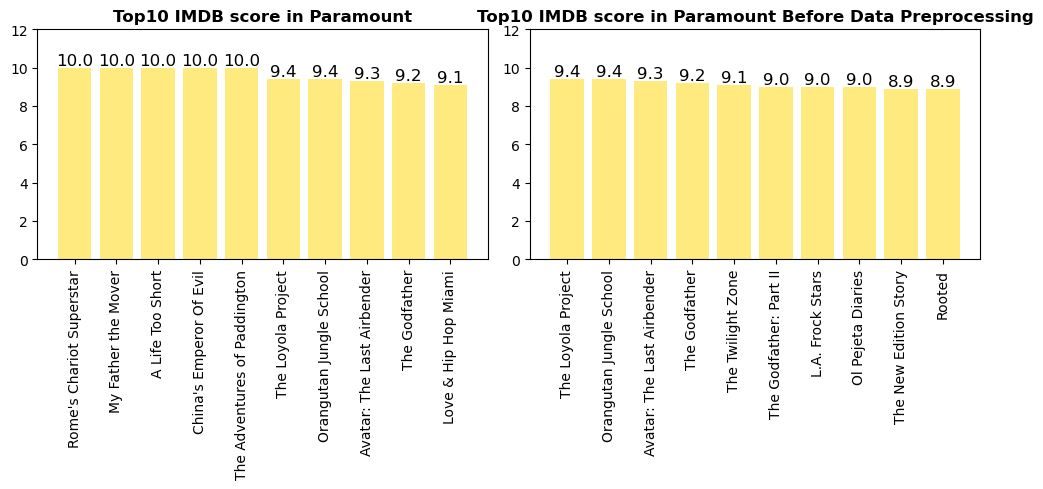

In [17]:
fig = plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
# imdb scores 상위 10개 그래프(수치 표시)
x = top_imdbscore.head(10)['title']
y = top_imdbscore.head(10)['imdb_score']
bar = plt.bar(x, y, color='gold', alpha=0.5)
plt.ylim(0, 12)

for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom', size = 12)
    
plt.xticks(rotation=90)
plt.title("Top10 IMDB score in Paramount",fontweight="bold")

plt.subplot(1,2,2)
# 결측치 제거 전 imdb scores top 10(수치 표시)
x = before_top_imdbscore.head(10)['title']
y = before_top_imdbscore.head(10)['imdb_score']
bar = plt.bar(x, y, color='gold', alpha=0.5)
plt.ylim(0, 12)

for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom', size = 12)
    
plt.xticks(rotation=90)
plt.title("Top10 IMDB score in Paramount Before Data Preprocessing",fontweight="bold")

plt.tight_layout()
plt.show()

In [18]:
# imdb votes 상위 10개
top_imdbvotes=para.sort_values('imdb_votes',ascending=False)
top_imdbvotes.head(10)

,id,title,type,release_year,runtime,genres,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
1072,tm122434,Forrest Gump,MOVIE,1994,142,"['romance', 'comedy', 'drama']",0.0,8.8,1994599.0,57.114,8.5
1068,tm112130,Pulp Fiction,MOVIE,1994,154,"['thriller', 'crime', 'drama']",0.0,8.9,1982722.0,55.923,8.5
547,tm155580,The Godfather,MOVIE,1972,175,"['drama', 'crime']",0.0,9.2,1780564.0,61.778,8.7
1614,tm157099,Interstellar,MOVIE,2014,169,"['scifi', 'drama', 'thriller']",0.0,8.6,1728756.0,122.172,8.4
1509,tm41792,Django Unchained,MOVIE,2012,165,"['western', 'drama']",0.0,8.4,1472668.0,56.588,8.1
1073,tm28142,Gladiator,MOVIE,2000,155,"['drama', 'action']",0.0,8.5,1453300.0,52.290,8.2
1077,tm57554,Saving Private Ryan,MOVIE,1998,169,"['drama', 'war']",0.0,8.6,1346020.0,54.874,8.2
550,tm112061,The Godfather: Part II,MOVIE,1974,195,"['drama', 'crime']",0.0,9.0,1230117.0,48.475,8.6
1069,tm191110,Titanic,MOVIE,1997,194,"['drama', 'romance']",0.0,7.9,1133692.0,127.413,7.9
1084,tm116655,Léon: The Professional,MOVIE,1994,110,"['crime', 'thriller', 'action', 'drama', 'euro...",0.0,8.5,1126151.0,41.872,8.3


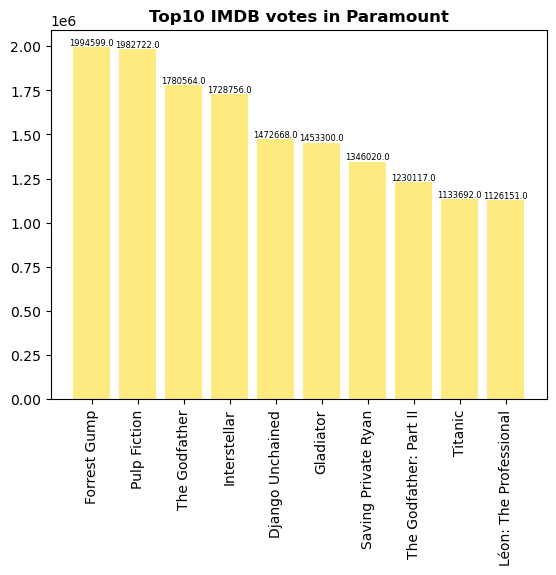

In [19]:
# imdb votes top 10(수치 표시)
x = top_imdbvotes.head(10)['title']
y = top_imdbvotes.head(10)['imdb_votes']
bar = plt.bar(x, y, color='gold', alpha=0.5)

for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom', size = 6)
    
plt.xticks(rotation=90)
plt.title("Top10 IMDB votes in Paramount",fontweight="bold")

plt.show()

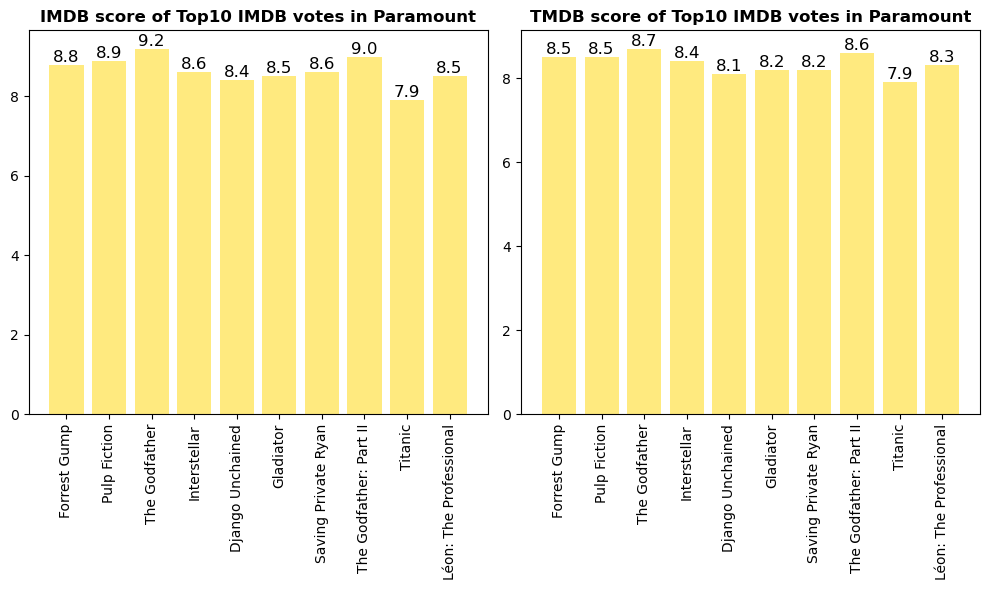

In [20]:
fig = plt.figure(figsize=(10,6))

# 상위 10개의 IMDB votes에 해당하는 컨텐츠의 IMDB score
plt.subplot(1,2,1)
x = top_imdbvotes.head(10)['title']
y = top_imdbvotes.head(10)['imdb_score']
bar = plt.bar(x, y, color='gold', alpha=0.5)

for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom', size = 12)
    
plt.xticks(rotation=90)
plt.title("IMDB score of Top10 IMDB votes in Paramount",fontweight="bold")

# 상위 10개의 IMDB votes에 해당하는 컨텐츠의 TMDB score
plt.subplot(1,2,2)
x = top_imdbvotes.head(10)['title']
y = top_imdbvotes.head(10)['tmdb_score']
bar = plt.bar(x, y, color='gold', alpha=0.5)

for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom', size = 12)
    
plt.xticks(rotation=90)
plt.title("TMDB score of Top10 IMDB votes in Paramount",fontweight="bold")

plt.tight_layout()
plt.show()

In [21]:
# tmdb popularity 상위 10개
top_tmdbpopularity=para.sort_values('tmdb_popularity',ascending=False)
top_tmdbpopularity.head(10)

,id,title,type,release_year,runtime,genres,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
2597,ts43075,Halo,SHOW,2022,52,"['scifi', 'thriller', 'war', 'action']",1.0,7.1,31375.0,4579.160,8.7
2381,tm374139,Sonic the Hedgehog,MOVIE,2020,99,"['scifi', 'action', 'comedy', 'family', 'fanta...",0.0,6.5,126887.0,893.650,7.4
1116,ts15312,The Daily Show with Trevor Noah,SHOW,1996,32,['comedy'],27.0,8.3,46718.0,749.525,6.4
2596,tm1000711,The Lost City,MOVIE,2022,112,"['action', 'comedy', 'romance']",0.0,6.5,23688.0,707.594,6.8
2604,tm927825,Scream,MOVIE,2022,114,"['thriller', 'horror']",0.0,6.4,87810.0,559.107,6.8
2608,tm460993,Clifford the Big Red Dog,MOVIE,2021,97,"['fantasy', 'comedy', 'family', 'animation', '...",0.0,5.9,11522.0,482.744,7.3
2600,tm847080,Jackass Forever,MOVIE,2022,96,"['comedy', 'action', 'documentation']",0.0,7.0,32699.0,468.032,6.9
2621,tm1151009,The In Between,MOVIE,2022,116,"['romance', 'drama', 'scifi']",0.0,5.8,5755.0,446.897,7.1
1618,ts20773,Scorpion,SHOW,2014,42,"['action', 'drama', 'thriller', 'crime']",4.0,7.0,52547.0,443.639,8.3
2051,ts304703,S.W.A.T.,SHOW,2017,42,"['crime', 'drama', 'thriller', 'action']",6.0,7.0,21813.0,439.647,8.1


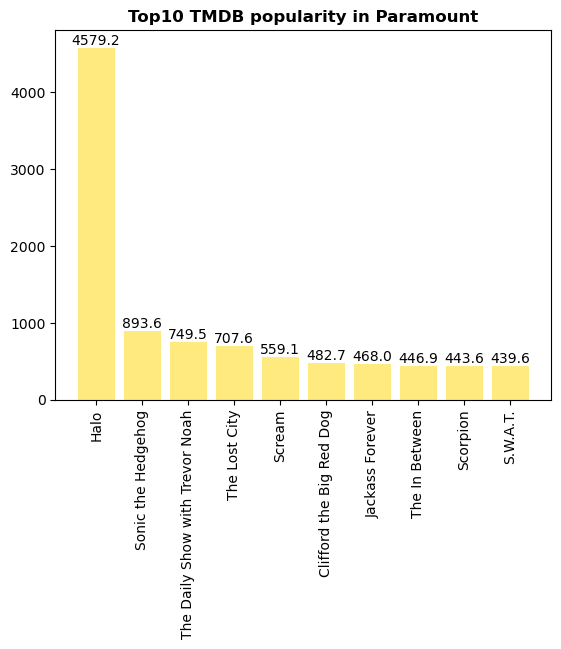

In [22]:
# tmdb popularity top 10(수치 표시)
x = top_tmdbpopularity.head(10)['title']
y = top_tmdbpopularity.head(10)['tmdb_popularity']
bar = plt.bar(x, y, color='gold', alpha=0.5)

for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom', size = 10)
    
plt.xticks(rotation=90)
plt.title("Top10 TMDB popularity in Paramount",fontweight="bold")

plt.show()

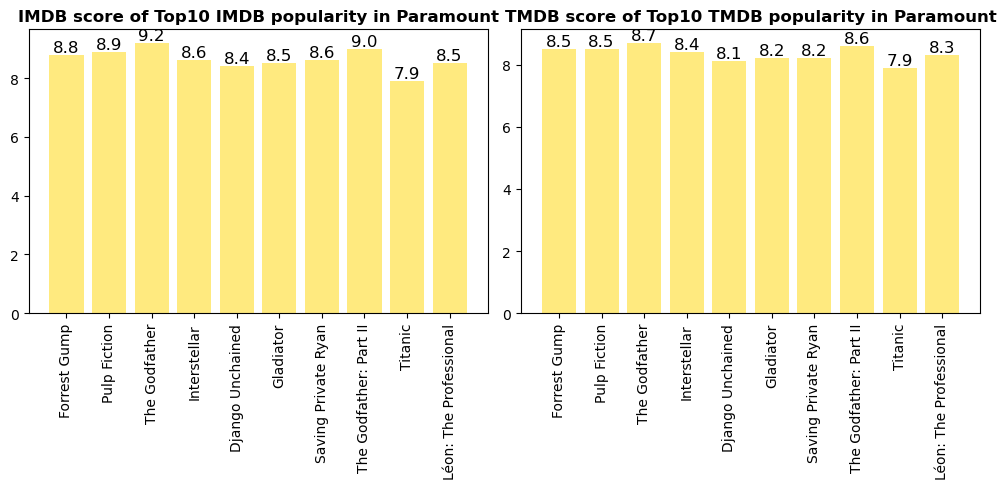

In [23]:
fig = plt.figure(figsize=(10,5))

# 상위 10개의 TMDB popularity에 해당하는 컨텐츠의 IMDB score
plt.subplot(1,2,1)
x = top_imdbvotes.head(10)['title']
y = top_imdbvotes.head(10)['imdb_score']
bar = plt.bar(x, y, color='gold', alpha=0.5)

for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom', size = 12)
    
plt.xticks(rotation=90)
plt.title("IMDB score of Top10 IMDB popularity in Paramount",fontweight="bold")

# 상위 10개의 TMDB popularity에 해당하는 컨텐츠의 TMDB score
plt.subplot(1,2,2)
x = top_imdbvotes.head(10)['title']
y = top_imdbvotes.head(10)['tmdb_score']
bar = plt.bar(x, y, color='Gold', alpha=0.5)

for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom', size = 12)
    
plt.xticks(rotation=90)
plt.title("TMDB score of Top10 TMDB popularity in Paramount",fontweight="bold")

plt.tight_layout()
plt.show()

In [24]:
# tmdb score 상위 10개
top_tmdbscore=para.sort_values('tmdb_score',ascending=False)
top_tmdbscore.head(10)

,id,title,type,release_year,runtime,genres,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
2001,tm244637,China's Emperor Of Evil,MOVIE,2016,60,"['documentation', 'history']",0.0,10.0,NaN,0.628,10.0
2103,ts76985,The Lost Tapes,SHOW,2017,58,"['documentation', 'drama', 'history', 'music',...",1.0,8.6,9.0,0.600,10.0
1410,ts18694,The Buried Life,SHOW,2010,22,"['comedy', 'reality', 'documentation']",2.0,8.6,597.0,1.941,10.0
2284,ts58087,Hood Adjacent with James Davis,SHOW,2017,21,['comedy'],1.0,5.6,151.0,0.708,10.0
1023,tm53190,Predator: The Quietus,MOVIE,1988,90,['horror'],0.0,3.0,132.0,0.961,10.0
2353,tm307673,The Obama Years: The Power of Words,MOVIE,2017,51,['documentation'],0.0,7.0,5.0,0.600,10.0
1482,tm79411,Christopher Titus: The 5th Annual End of the W...,MOVIE,2007,60,"['comedy', 'documentation']",0.0,7.9,173.0,1.211,10.0
1989,tm405222,Behind Some Dark Cloud,MOVIE,2015,90,"['drama', 'romance']",0.0,5.9,21.0,0.600,10.0
2591,ts216123,Love & Listings,SHOW,2019,42,['reality'],2.0,6.0,405.0,0.983,10.0
2440,tm880110,Woman in Motion,MOVIE,2019,96,['documentation'],0.0,8.5,297.0,2.056,10.0


In [25]:
# 결측치 처리 전 tmdb votes 상위 10개
before_top_tmdbscore=para.sort_values('tmdb_score',ascending=False)
before_top_tmdbscore.head(10)

,id,title,type,release_year,runtime,genres,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
2001,tm244637,China's Emperor Of Evil,MOVIE,2016,60,"['documentation', 'history']",0.0,10.0,NaN,0.628,10.0
2103,ts76985,The Lost Tapes,SHOW,2017,58,"['documentation', 'drama', 'history', 'music',...",1.0,8.6,9.0,0.600,10.0
1410,ts18694,The Buried Life,SHOW,2010,22,"['comedy', 'reality', 'documentation']",2.0,8.6,597.0,1.941,10.0
2284,ts58087,Hood Adjacent with James Davis,SHOW,2017,21,['comedy'],1.0,5.6,151.0,0.708,10.0
1023,tm53190,Predator: The Quietus,MOVIE,1988,90,['horror'],0.0,3.0,132.0,0.961,10.0
2353,tm307673,The Obama Years: The Power of Words,MOVIE,2017,51,['documentation'],0.0,7.0,5.0,0.600,10.0
1482,tm79411,Christopher Titus: The 5th Annual End of the W...,MOVIE,2007,60,"['comedy', 'documentation']",0.0,7.9,173.0,1.211,10.0
1989,tm405222,Behind Some Dark Cloud,MOVIE,2015,90,"['drama', 'romance']",0.0,5.9,21.0,0.600,10.0
2591,ts216123,Love & Listings,SHOW,2019,42,['reality'],2.0,6.0,405.0,0.983,10.0
2440,tm880110,Woman in Motion,MOVIE,2019,96,['documentation'],0.0,8.5,297.0,2.056,10.0


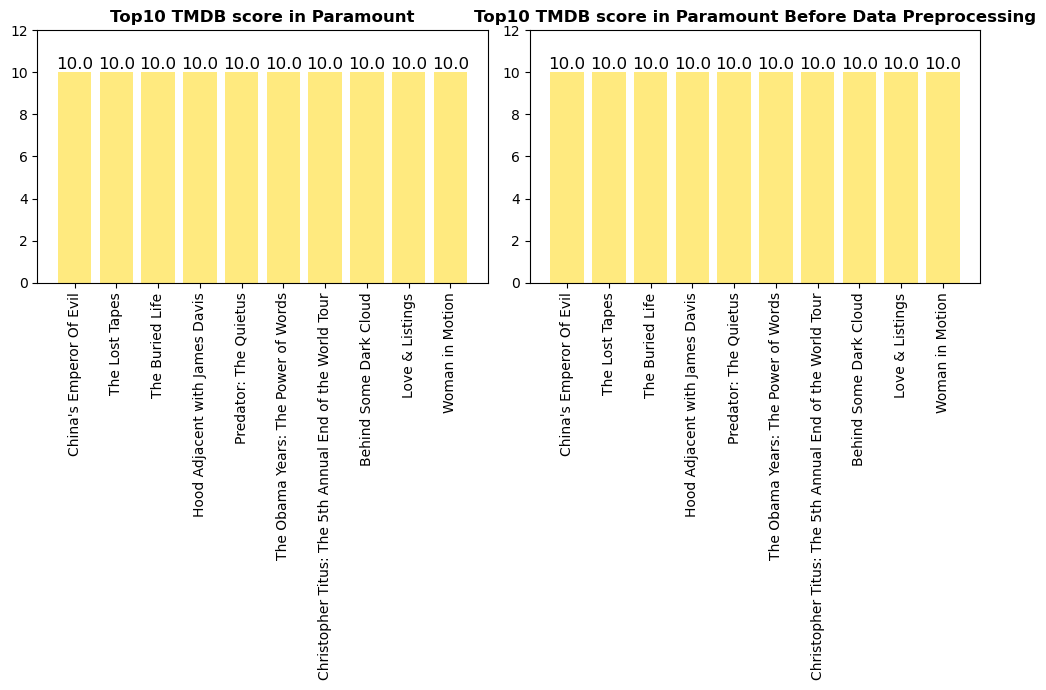

In [26]:
fig = plt.figure(figsize=(10,7))

plt.subplot(1,2,1)
# tmdb scores top 10(수치 표시)
x = top_tmdbscore.head(10)['title']
y = top_tmdbscore.head(10)['tmdb_score']
bar = plt.bar(x, y, color='gold', alpha=0.5)
plt.ylim(0, 12)

for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom', size = 12)
    
plt.xticks(rotation=90)
plt.title("Top10 TMDB score in Paramount",fontweight="bold")



plt.subplot(1,2,2)
# 결측치 제거 전 tmdb scores top 10(수치 표시)
x = before_top_tmdbscore.head(10)['title']
y = before_top_tmdbscore.head(10)['tmdb_score']
bar = plt.bar(x, y, color='gold', alpha=0.5)
plt.ylim(0, 12)

for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom', size = 12)
    
plt.xticks(rotation=90)
plt.title("Top10 TMDB score in Paramount Before Data Preprocessing",fontweight="bold")

plt.tight_layout()
plt.show()

---------

In [27]:
# para_tmdb 변수를 만들고 a_tmdb_to_imdb.csv 파일의 데이터를 할당
para_tmdb = pd.read_csv('/Users/soy/aiffel/paramount/paramount_imdb_to_tmdb_prediction.csv')

# para_tmdb의 head 값 확인하기
para_tmdb.head()

,Unnamed: 0.1,Unnamed: 0,id,title,type,release_year,age_certification,runtime,genres,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,prediction
0,0,0,tm19248,The General,MOVIE,1926,NaN,78,"['action', 'drama', 'war', 'western', 'comedy'...",0.0,8.2,89766.0,8.647,8.0,NaN
1,1,1,tm83884,His Girl Friday,MOVIE,1940,NaN,92,"['comedy', 'drama', 'romance']",0.0,7.8,57835.0,11.270,7.4,NaN
2,2,2,tm19424,Detour,MOVIE,1945,NaN,66,"['thriller', 'drama', 'crime']",0.0,7.3,17233.0,7.757,7.2,NaN
3,3,3,tm112005,Marihuana,MOVIE,1936,NaN,57,"['crime', 'drama']",0.0,4.0,864.0,3.748,3.6,NaN
4,4,4,tm22806,Intolerance: Love's Struggle Throughout the Ages,MOVIE,1916,NaN,197,"['history', 'drama']",0.0,7.7,15242.0,9.412,7.2,NaN


In [28]:
# para_imdb 변수를 만들고 a_tmdb_to_imdb.csv 파일의 데이터를 할당
para_imdb = pd.read_csv('/Users/soy/aiffel/paramount/paramount_tmdb_to_imdb_prediction.csv')

# para_tmdb의 head 값 확인하기
para_imdb.head()

,Unnamed: 0.1,Unnamed: 0,id,title,type,release_year,age_certification,runtime,genres,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,prediction
0,0,0,tm19248,The General,MOVIE,1926,NaN,78,"['action', 'drama', 'war', 'western', 'comedy'...",0.0,8.2,89766.0,8.647,8.0,NaN
1,1,1,tm83884,His Girl Friday,MOVIE,1940,NaN,92,"['comedy', 'drama', 'romance']",0.0,7.8,57835.0,11.270,7.4,NaN
2,2,2,tm19424,Detour,MOVIE,1945,NaN,66,"['thriller', 'drama', 'crime']",0.0,7.3,17233.0,7.757,7.2,NaN
3,3,3,tm112005,Marihuana,MOVIE,1936,NaN,57,"['crime', 'drama']",0.0,4.0,864.0,3.748,3.6,NaN
4,4,4,tm22806,Intolerance: Love's Struggle Throughout the Ages,MOVIE,1916,NaN,197,"['history', 'drama']",0.0,7.7,15242.0,9.412,7.2,NaN


In [29]:
# imdb NaN값인 경우 prediction으로 채워주기
para_imdb['imdb_score'] = para_imdb['imdb_score'].fillna(para_imdb['prediction'])
para_imdb

,Unnamed: 0.1,Unnamed: 0,id,title,type,release_year,age_certification,runtime,genres,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,prediction
0,0,0,tm19248,The General,MOVIE,1926,NaN,78,"['action', 'drama', 'war', 'western', 'comedy'...",0.0,8.20000,89766.0,8.647,8.0,NaN
1,1,1,tm83884,His Girl Friday,MOVIE,1940,NaN,92,"['comedy', 'drama', 'romance']",0.0,7.80000,57835.0,11.270,7.4,NaN
2,2,2,tm19424,Detour,MOVIE,1945,NaN,66,"['thriller', 'drama', 'crime']",0.0,7.30000,17233.0,7.757,7.2,NaN
3,3,3,tm112005,Marihuana,MOVIE,1936,NaN,57,"['crime', 'drama']",0.0,4.00000,864.0,3.748,3.6,NaN
4,4,4,tm22806,Intolerance: Love's Struggle Throughout the Ages,MOVIE,1916,NaN,197,"['history', 'drama']",0.0,7.70000,15242.0,9.412,7.2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2688,2688,2816,tm1106415,Destination Porto: The Unimaginable Journey,MOVIE,2021,PG,85,['documentation'],0.0,7.70000,8.0,0.600,NaN,NaN
2689,2689,2820,ts305329,House Calls with Dr. Phil,SHOW,2021,TV-14,43,['reality'],1.0,5.40000,35.0,0.600,NaN,NaN
2690,2690,2821,ts291097,Disrupt & Dismantle with Soledad O'Brien,SHOW,2021,TV-MA,40,['documentation'],1.0,3.50000,18.0,NaN,NaN,NaN
2691,2691,2822,tm1100359,Race Against Time: The CIA and 9/11,MOVIE,2021,NaN,89,['documentation'],0.0,4.60000,64.0,2.403,NaN,NaN


In [30]:
# tmdb NaN값인 경우 prediction으로 채워주기
para_tmdb['tmdb_score'] = para_tmdb['tmdb_score'].fillna(para_tmdb['prediction'])
para_tmdb

,Unnamed: 0.1,Unnamed: 0,id,title,type,release_year,age_certification,runtime,genres,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,prediction
0,0,0,tm19248,The General,MOVIE,1926,NaN,78,"['action', 'drama', 'war', 'western', 'comedy'...",0.0,8.2,89766.0,8.647,8.00000,NaN
1,1,1,tm83884,His Girl Friday,MOVIE,1940,NaN,92,"['comedy', 'drama', 'romance']",0.0,7.8,57835.0,11.270,7.40000,NaN
2,2,2,tm19424,Detour,MOVIE,1945,NaN,66,"['thriller', 'drama', 'crime']",0.0,7.3,17233.0,7.757,7.20000,NaN
3,3,3,tm112005,Marihuana,MOVIE,1936,NaN,57,"['crime', 'drama']",0.0,4.0,864.0,3.748,3.60000,NaN
4,4,4,tm22806,Intolerance: Love's Struggle Throughout the Ages,MOVIE,1916,NaN,197,"['history', 'drama']",0.0,7.7,15242.0,9.412,7.20000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2688,2688,2816,tm1106415,Destination Porto: The Unimaginable Journey,MOVIE,2021,PG,85,['documentation'],0.0,7.7,8.0,0.600,7.25237,7.25237
2689,2689,2820,ts305329,House Calls with Dr. Phil,SHOW,2021,TV-14,43,['reality'],1.0,5.4,35.0,0.600,5.62476,5.62476
2690,2690,2821,ts291097,Disrupt & Dismantle with Soledad O'Brien,SHOW,2021,TV-MA,40,['documentation'],1.0,3.5,18.0,NaN,4.28021,4.28021
2691,2691,2822,tm1100359,Race Against Time: The CIA and 9/11,MOVIE,2021,NaN,89,['documentation'],0.0,4.6,64.0,2.403,5.05864,5.05864


In [31]:
# imdb score 상위 10개
after_top_imdbscore=para_imdb.sort_values('imdb_score',ascending=False)
after_top_imdbscore.head(10)

,Unnamed: 0.1,Unnamed: 0,id,title,type,release_year,age_certification,runtime,genres,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,prediction
2147,2147,2205,ts107506,Orangutan Jungle School,SHOW,2018,TV-PG,48,['documentation'],2.0,9.4,143.0,1.272,8.5,NaN
2660,2660,2775,tm1175333,The Loyola Project,MOVIE,2022,NaN,88,['documentation'],0.0,9.4,10.0,0.915,NaN,NaN
1244,1244,1249,ts3371,Avatar: The Last Airbender,SHOW,2005,TV-Y7,24,"['scifi', 'family', 'fantasy', 'animation', 'a...",3.0,9.3,297336.0,61.284,8.7,NaN
547,547,549,tm155580,The Godfather,MOVIE,1972,R,175,"['drama', 'crime']",0.0,9.2,1780564.0,61.778,8.7,NaN
548,548,550,ts22109,The Twilight Zone,SHOW,1959,TV-PG,28,"['scifi', 'drama', 'fantasy', 'horror', 'thril...",5.0,9.1,80605.0,29.897,8.5,NaN
1707,1707,1741,ts166066,L.A. Frock Stars,SHOW,2013,TV-PG,32,['reality'],2.0,9.0,41.0,NaN,NaN,NaN
2027,2027,2080,ts125631,Ol Pejeta Diaries,SHOW,2015,TV-PG,23,[],3.0,9.0,6.0,NaN,NaN,NaN
550,550,552,tm112061,The Godfather: Part II,MOVIE,1974,R,195,"['drama', 'crime']",0.0,9.0,1230117.0,48.475,8.6,NaN
2194,2194,2254,ts109900,Rooted,SHOW,2018,TV-PG,48,['documentation'],1.0,8.9,39.0,1.471,NaN,NaN
2673,2673,2793,ts282236,Legends of the Pharaohs,SHOW,2021,TV-PG,44,['documentation'],1.0,8.9,20.0,0.644,NaN,NaN


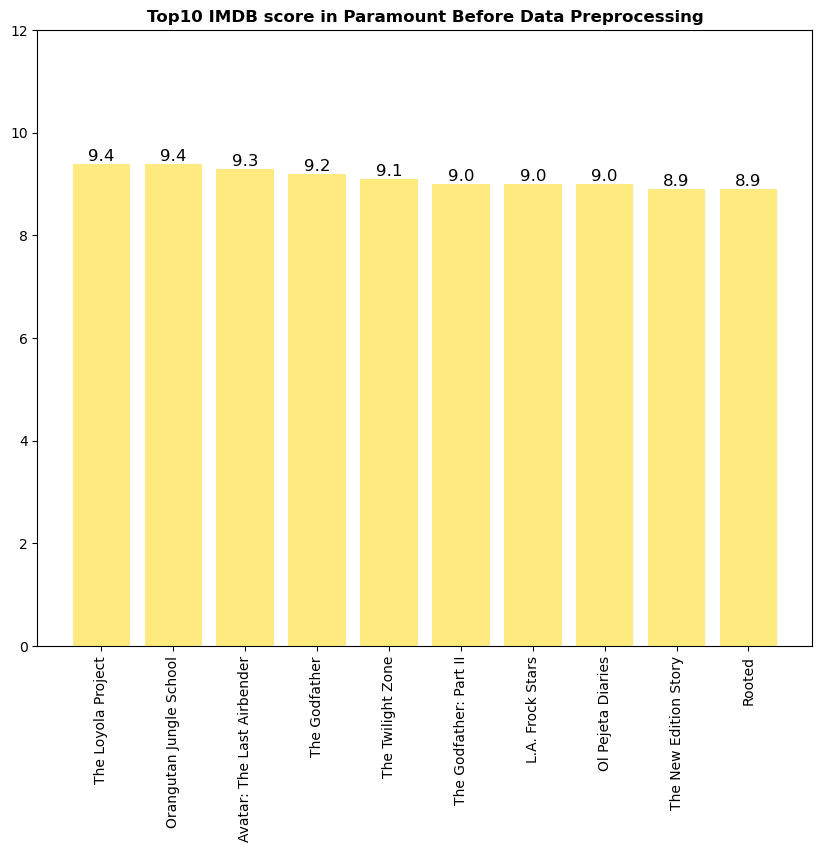

In [32]:
fig = plt.figure(figsize=(10,8))

x = before_top_imdbscore.head(10)['title']
y = before_top_imdbscore.head(10)['imdb_score']
bar = plt.bar(x, y, color='gold', alpha=0.5)
plt.ylim(0, 12)

for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom', size = 12)
    
plt.xticks(rotation=90)
plt.title("Top10 IMDB score in Paramount Before Data Preprocessing",fontweight="bold")

plt.show()

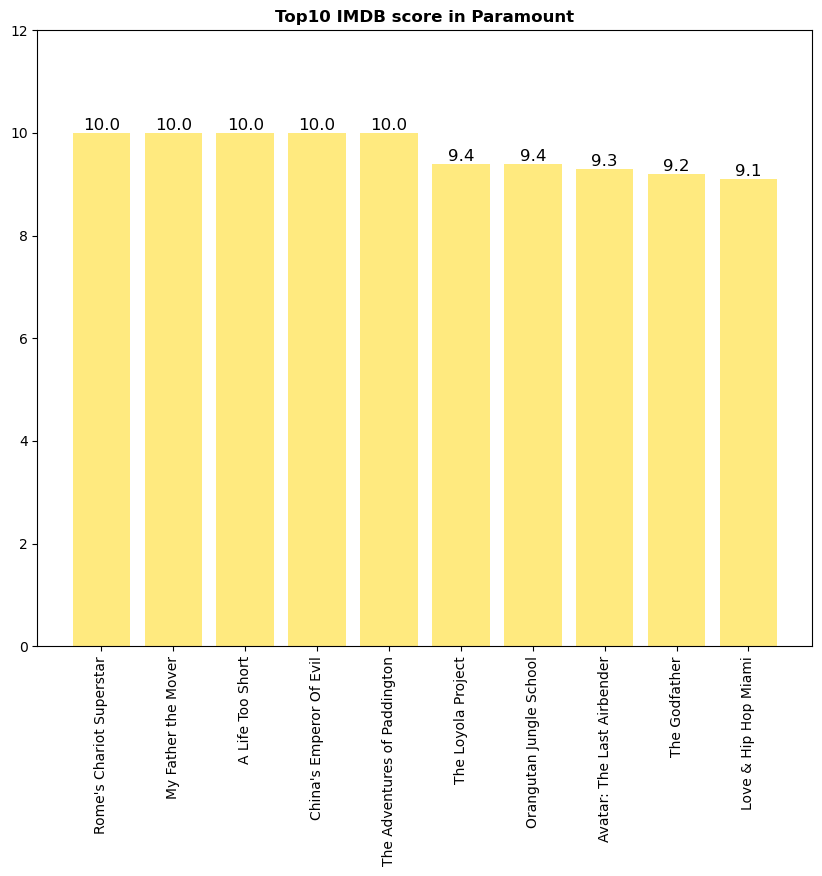

In [33]:
fig = plt.figure(figsize=(10,8))

x = top_imdbscore.head(10)['title']
y = top_imdbscore.head(10)['imdb_score']
bar = plt.bar(x, y, color='gold', alpha=0.5)
plt.ylim(0, 12)

for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom', size = 12)
    
plt.xticks(rotation=90)
plt.title("Top10 IMDB score in Paramount",fontweight="bold")

plt.show()

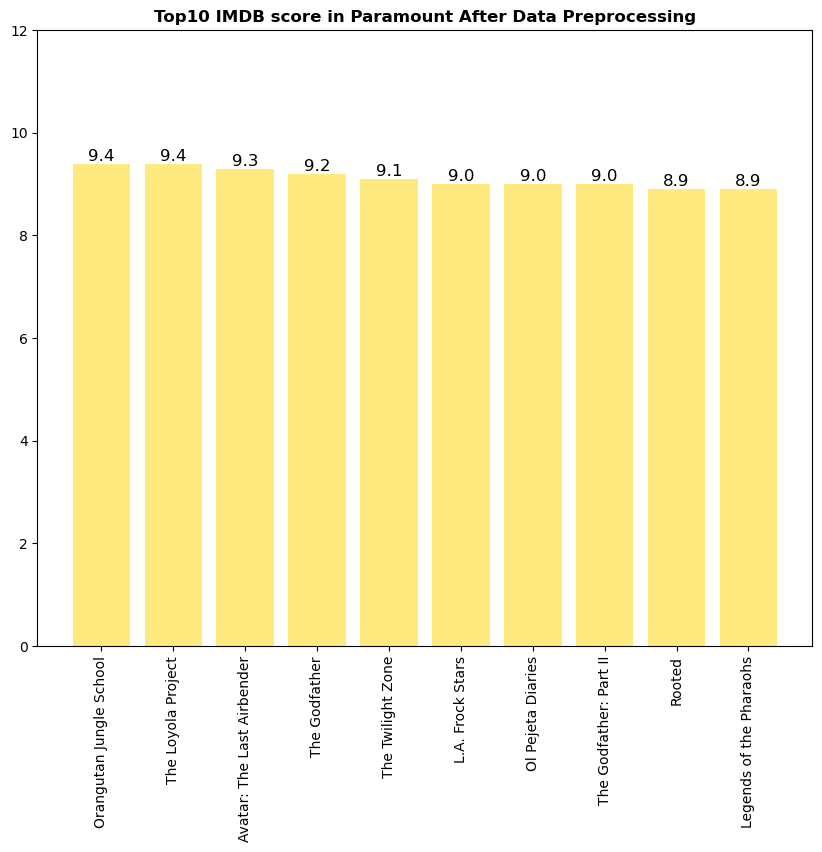

In [34]:
fig = plt.figure(figsize=(10,8))

x = after_top_imdbscore.head(10)['title']
y = after_top_imdbscore.head(10)['imdb_score']
bar = plt.bar(x, y, color='gold', alpha=0.5)
plt.ylim(0, 12)

for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom', size = 12)
    
plt.xticks(rotation=90)
plt.title("Top10 IMDB score in Paramount After Data Preprocessing",fontweight="bold")

plt.show()

In [35]:
# tmdb score 상위 10개
after_top_tmdbscore=para_tmdb.sort_values('tmdb_score',ascending=False)
after_top_tmdbscore.head(10)

,Unnamed: 0.1,Unnamed: 0,id,title,type,release_year,age_certification,runtime,genres,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,prediction
2434,2434,2516,ts87153,Lindsay Lohan's Beach Club,SHOW,2019,TV-14,38,['reality'],1.0,4.0,510.0,1.812,10.0,NaN
2561,2561,2655,tm679361,Black Hole Hunters,MOVIE,2019,NaN,60,['documentation'],0.0,6.9,55.0,2.113,10.0,NaN
1023,1023,1027,tm53190,Predator: The Quietus,MOVIE,1988,NaN,90,['horror'],0.0,3.0,132.0,0.961,10.0,NaN
2552,2552,2643,ts280372,AwesomenessTV's Next Influencer,SHOW,2020,TV-14,27,['reality'],3.0,2.1,104.0,0.910,10.0,NaN
1989,1989,2038,tm405222,Behind Some Dark Cloud,MOVIE,2015,NaN,90,"['drama', 'romance']",0.0,5.9,21.0,0.600,10.0,NaN
2353,2353,2421,tm307673,The Obama Years: The Power of Words,MOVIE,2017,NaN,51,['documentation'],0.0,7.0,5.0,0.600,10.0,NaN
2216,2216,2276,tm315211,Pocahontas: Beyond the Myth,MOVIE,2017,NaN,51,"['history', 'documentation']",0.0,7.5,49.0,1.215,10.0,NaN
1410,1410,1415,ts18694,The Buried Life,SHOW,2010,TV-14,22,"['comedy', 'reality', 'documentation']",2.0,8.6,597.0,1.941,10.0,NaN
1862,1862,1908,ts89128,This Is Not Happening,SHOW,2015,TV-MA,21,['comedy'],4.0,7.9,415.0,1.390,10.0,NaN
1482,1482,1497,tm79411,Christopher Titus: The 5th Annual End of the W...,MOVIE,2007,NaN,60,"['comedy', 'documentation']",0.0,7.9,173.0,1.211,10.0,NaN


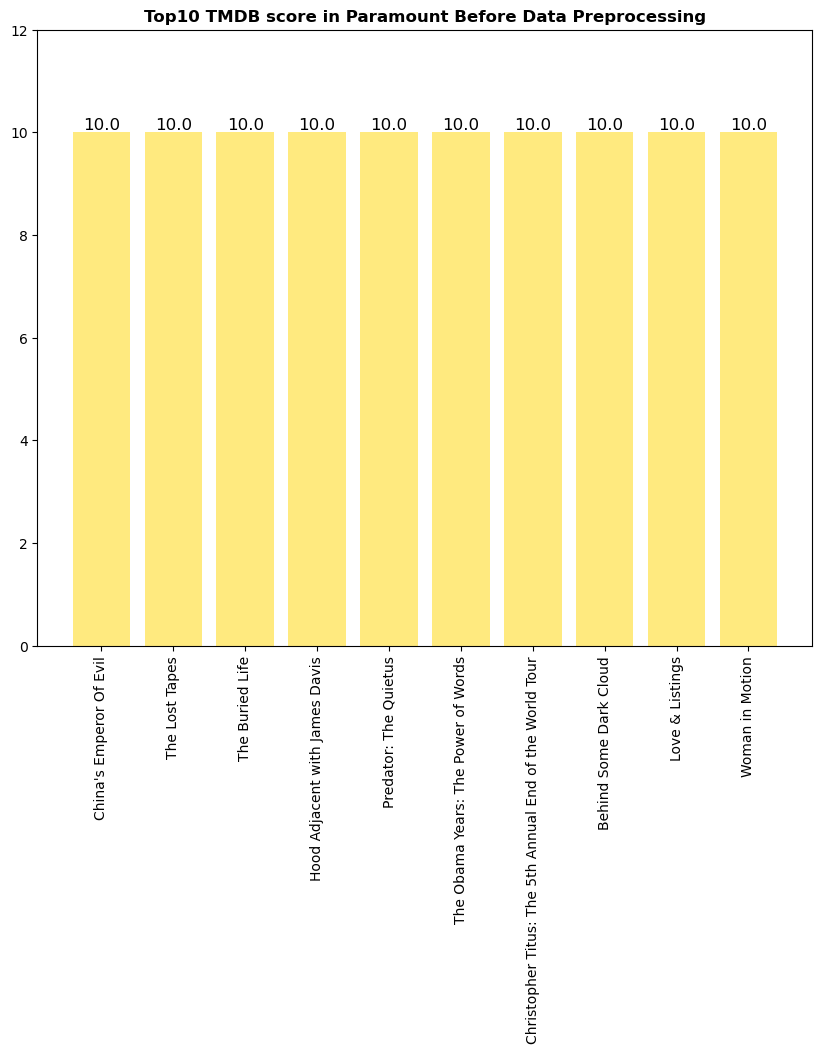

In [36]:
fig = plt.figure(figsize=(10,8))

x = before_top_tmdbscore.head(10)['title']
y = before_top_tmdbscore.head(10)['tmdb_score']
bar = plt.bar(x, y, color='gold', alpha=0.5)
plt.ylim(0, 12)

for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom', size = 12)
    
plt.xticks(rotation=90)
plt.title("Top10 TMDB score in Paramount Before Data Preprocessing",fontweight="bold")

plt.show()

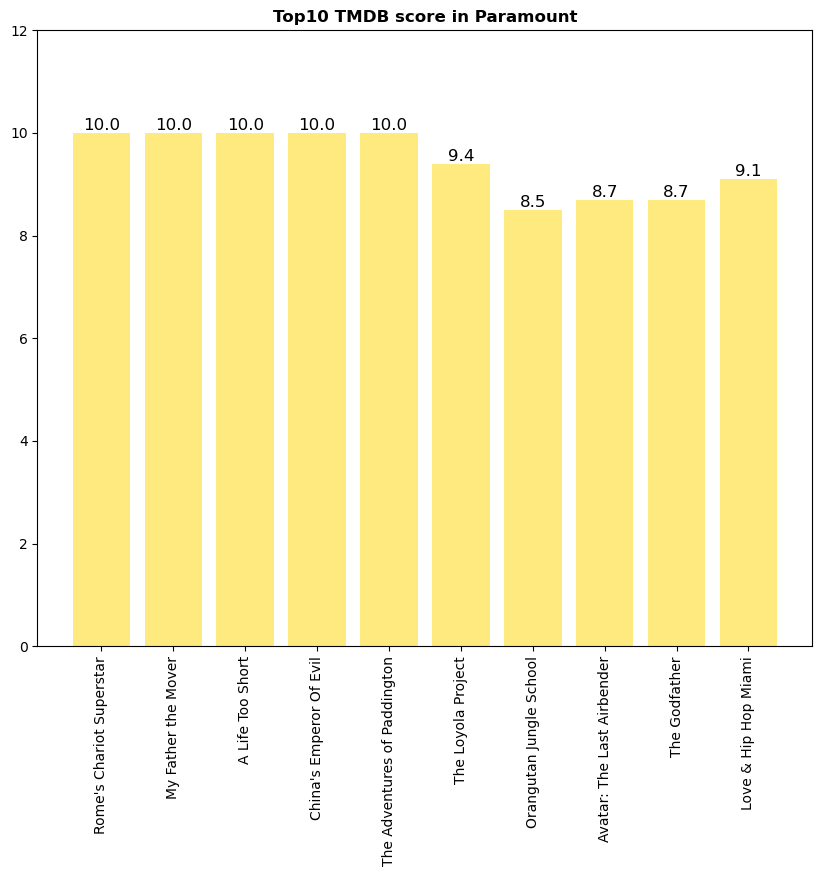

In [37]:
fig = plt.figure(figsize=(10,8))

x = top_imdbscore.head(10)['title']
y = top_imdbscore.head(10)['tmdb_score']
bar = plt.bar(x, y, color='gold', alpha=0.5)
plt.ylim(0, 12)

for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom', size = 12)
    
plt.xticks(rotation=90)
plt.title("Top10 TMDB score in Paramount",fontweight="bold")

plt.show()

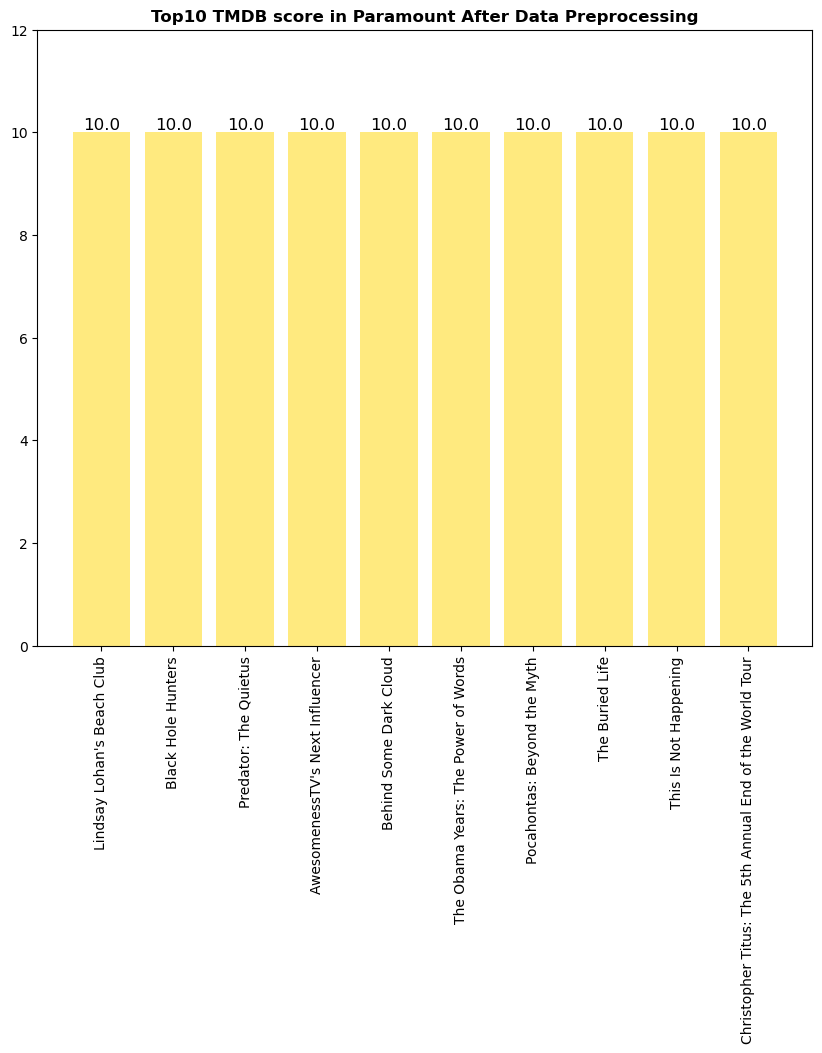

In [38]:
fig = plt.figure(figsize=(10,8))

x = after_top_tmdbscore.head(10)['title']
y = after_top_tmdbscore.head(10)['tmdb_score']
bar = plt.bar(x, y, color='gold', alpha=0.5)
plt.ylim(0, 12)

for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom', size = 12)
    
plt.xticks(rotation=90)
plt.title("Top10 TMDB score in Paramount After Data Preprocessing",fontweight="bold")

plt.show()

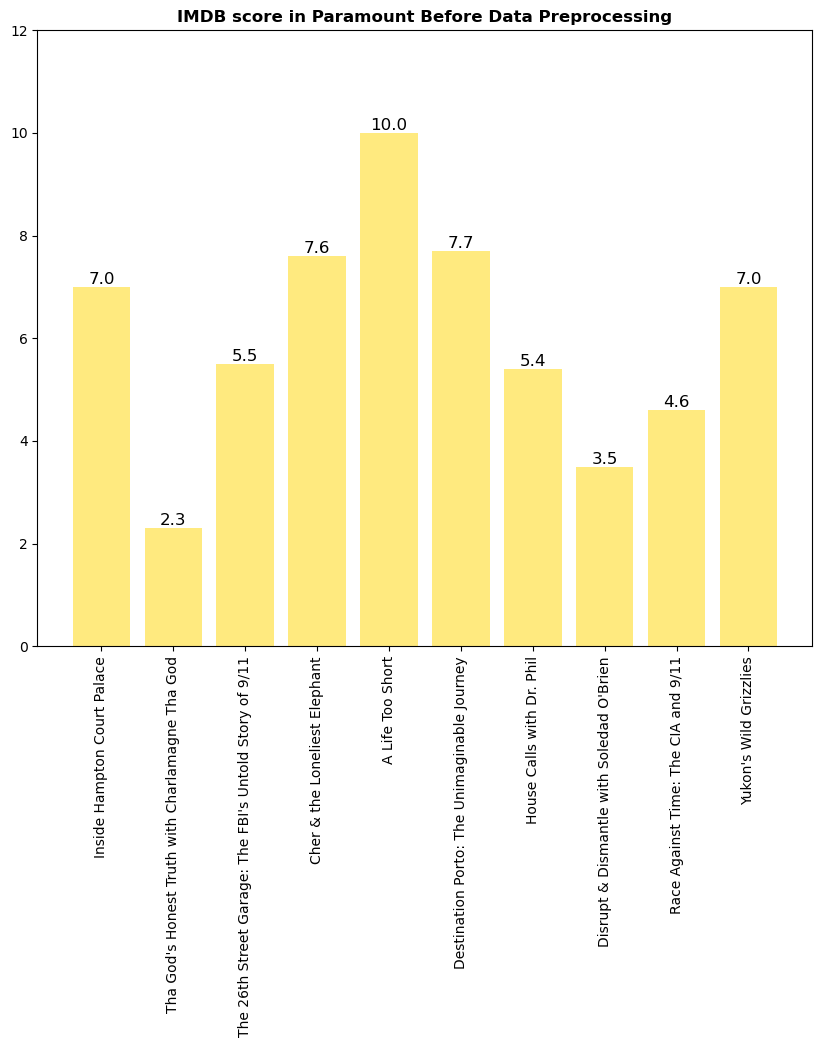

In [39]:
fig = plt.figure(figsize=(10,8))

x = para.tail(10)['title']
y = para.tail(10)['imdb_score']
bar = plt.bar(x, y, color='gold', alpha=0.5)
plt.ylim(0, 12)

for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom', size = 12)
    
plt.xticks(rotation=90)
plt.title("IMDB score in Paramount Before Data Preprocessing",fontweight="bold")

plt.show()

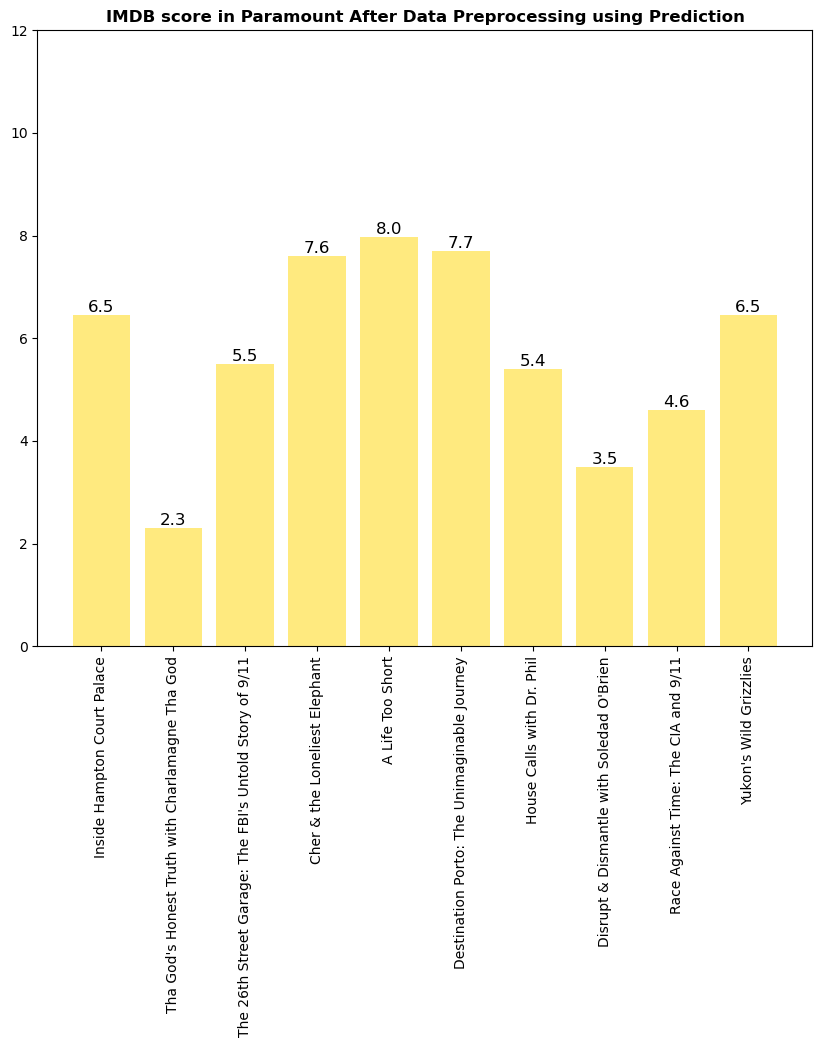

In [42]:
fig = plt.figure(figsize=(10,8))

x = para_imdb.tail(10)['title']
y = para_imdb.tail(10)['imdb_score']
bar = plt.bar(x, y, color='gold', alpha=0.5)
plt.ylim(0, 12)

for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom', size = 12)
    
plt.xticks(rotation=90)
plt.title("IMDB score in Paramount After Data Preprocessing using Prediction",fontweight="bold")

plt.show()

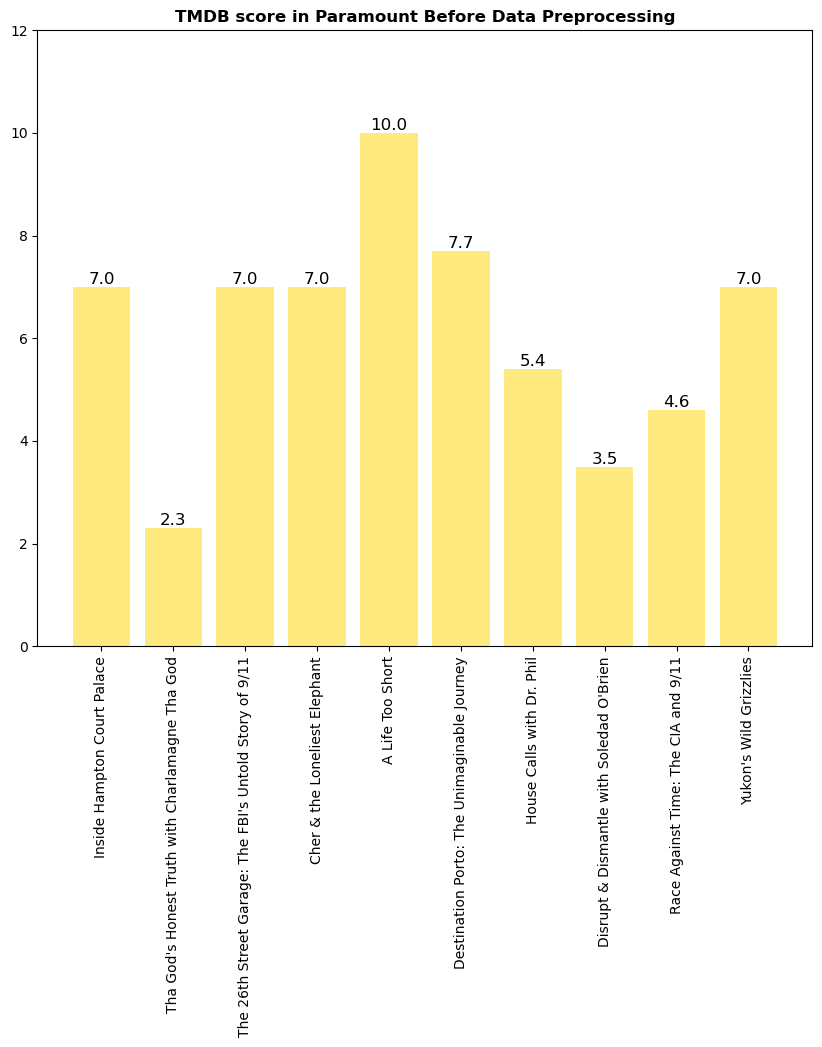

In [48]:
fig = plt.figure(figsize=(10,8))

x = para.tail(10)['title']
y = para.tail(10)['tmdb_score']
bar = plt.bar(x, y, color='gold', alpha=0.5)
plt.ylim(0, 12)

for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom', size = 12)
    
plt.xticks(rotation=90)
plt.title("TMDB score in Paramount Before Data Preprocessing",fontweight="bold")

plt.show()

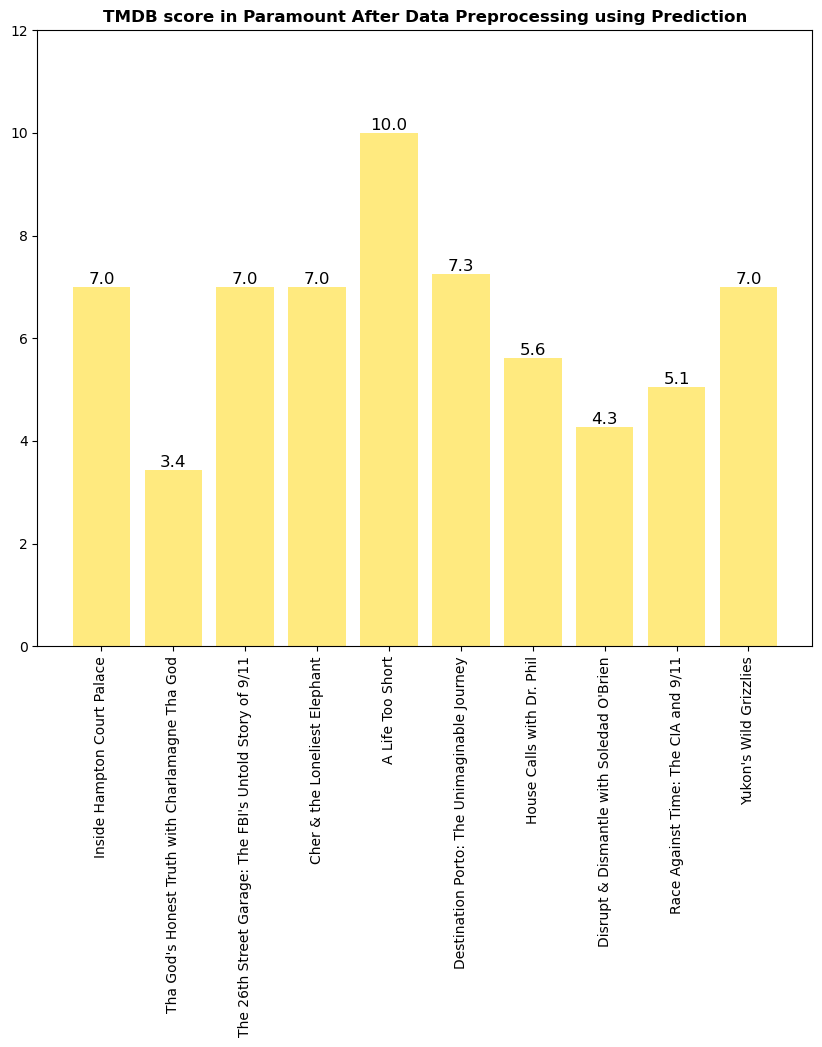

In [46]:
fig = plt.figure(figsize=(10,8))

x = para_tmdb.tail(10)['title']
y = para_tmdb.tail(10)['tmdb_score']
bar = plt.bar(x, y, color='gold', alpha=0.5)
plt.ylim(0, 12)

for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom', size = 12)
    
plt.xticks(rotation=90)
plt.title("TMDB score in Paramount After Data Preprocessing using Prediction",fontweight="bold")

plt.show()

In [51]:
# imdb votes 상위 10개
after_top_imdbvotes=para_imdb.sort_values('imdb_votes',ascending=False)
after_top_imdbvotes.head(10)

,Unnamed: 0.1,Unnamed: 0,id,title,type,release_year,age_certification,runtime,genres,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,prediction
1072,1072,1077,tm122434,Forrest Gump,MOVIE,1994,PG-13,142,"['romance', 'comedy', 'drama']",0.0,8.8,1994599.0,57.114,8.5,NaN
1068,1068,1073,tm112130,Pulp Fiction,MOVIE,1994,R,154,"['thriller', 'crime', 'drama']",0.0,8.9,1982722.0,55.923,8.5,NaN
547,547,549,tm155580,The Godfather,MOVIE,1972,R,175,"['drama', 'crime']",0.0,9.2,1780564.0,61.778,8.7,NaN
1614,1614,1648,tm157099,Interstellar,MOVIE,2014,PG-13,169,"['scifi', 'drama', 'thriller']",0.0,8.6,1728756.0,122.172,8.4,NaN
1509,1509,1537,tm41792,Django Unchained,MOVIE,2012,R,165,"['western', 'drama']",0.0,8.4,1472668.0,56.588,8.1,NaN
1073,1073,1078,tm28142,Gladiator,MOVIE,2000,R,155,"['drama', 'action']",0.0,8.5,1453300.0,52.290,8.2,NaN
1077,1077,1082,tm57554,Saving Private Ryan,MOVIE,1998,R,169,"['drama', 'war']",0.0,8.6,1346020.0,54.874,8.2,NaN
550,550,552,tm112061,The Godfather: Part II,MOVIE,1974,R,195,"['drama', 'crime']",0.0,9.0,1230117.0,48.475,8.6,NaN
1069,1069,1074,tm191110,Titanic,MOVIE,1997,PG-13,194,"['drama', 'romance']",0.0,7.9,1133692.0,127.413,7.9,NaN
1084,1084,1089,tm116655,Léon: The Professional,MOVIE,1994,R,110,"['crime', 'thriller', 'action', 'drama', 'euro...",0.0,8.5,1126151.0,41.872,8.3,NaN


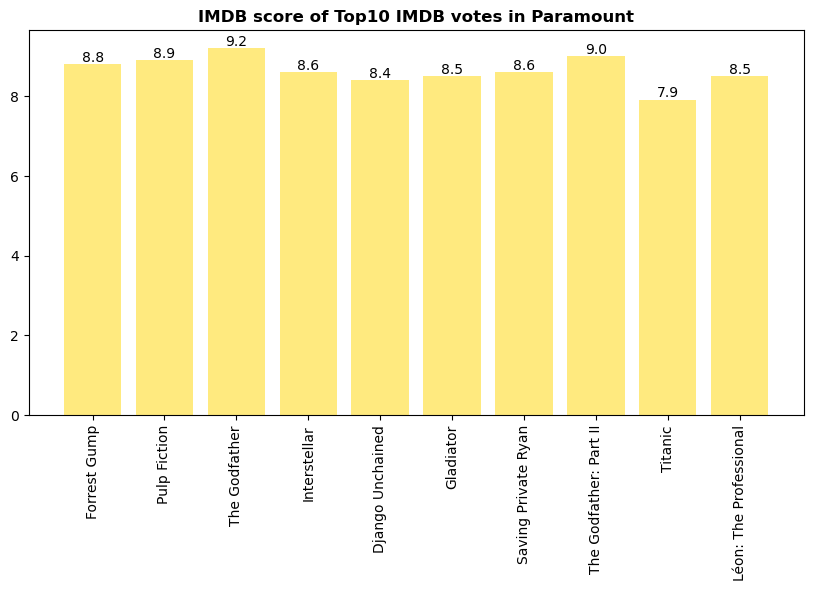

In [53]:
fig = plt.figure(figsize=(10,5))

# imdb votes top 10에 따른 imdb score
x = top_imdbvotes.head(10)['title']
y = top_imdbvotes.head(10)['imdb_score']
bar = plt.bar(x, y, color='gold', alpha=0.5)

for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom', size = 10)
    
plt.xticks(rotation=90)
plt.title("IMDB score of Top10 IMDB votes in Paramount",fontweight="bold")

plt.show()